# What is a pitch angle?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gzbuilder_analysis.aggregation import make_ellipse
from gzbuilder_analysis.aggregation.spirals.utils import xy_from_r_theta
from gzbuilder_analysis.rendering.spiral import inclined_lsp
from descartes import PolygonPatch
from matplotlib.patches import Wedge

/Users/tlingard/anaconda3/lib/python3.6/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


[<matplotlib.lines.Line2D object at 0x7fe03e690198>, <matplotlib.lines.Line2D object at 0x7fe03e64c898>, <matplotlib.patches.PathPatch object at 0x7fe03e5f22b0>]
[<matplotlib.patches.PathPatch object at 0x7fe03e5f22b0>, <matplotlib.lines.Line2D object at 0x7fe03e690198>, <matplotlib.lines.Line2D object at 0x7fe03e64c898>]


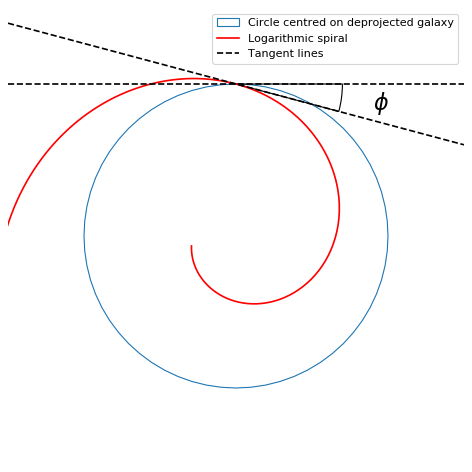

In [2]:
disk = make_ellipse(dict(mux=0, muy=0, Re=1, q=1, roll=0))

plt.figure(figsize=(6, 6), dpi=80)
ax = plt.gca()
disc_plot = ax.add_patch(PolygonPatch(disk, ec='C0', fc='none', label='Circle centred on deprojected galaxy'))

t = np.linspace(0, 2*np.pi, 200)
spiral_plot, = plt.plot(*inclined_lsp(0.3, 15, 1, np.pi + 0.22, t).T, c='r', label='Logarithmic spiral')

# add in the tangent lines
plt.axhline(1, c='k', ls='--')
tangent_plot, = plt.plot([-1.5, 1.5], [1.4, 0.6], c='k', ls='--', label='Tangent lines')
ax.add_patch(Wedge((0, 1), 0.7, np.rad2deg(np.arctan2(-0.8, 3)), 0, fc='none', ec='k'))
plt.text(0.9, 0.83, r'$\phi$', fontsize=20)
[f(-1.5, 1.5) for f in (plt.xlim, plt.ylim)];
plt.legend()
plt.axis('off')

handles, labels = ax.get_legend_handles_labels()
print(handles)
print([disc_plot, spiral_plot, tangent_plot])
order = [0, 2, 1]
ax.legend(
    [disc_plot, spiral_plot, tangent_plot],
    ['Circle centred on deprojected galaxy', 'Logarithmic spiral', 'Tangent lines'],
)
plt.tight_layout()
plt.savefig('plots/pitch-angle-explanation.pdf', bbox_inches='tight')
plt.savefig('plots/pitch-angle-explanation.png', bbox_inches='tight')